In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('data/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


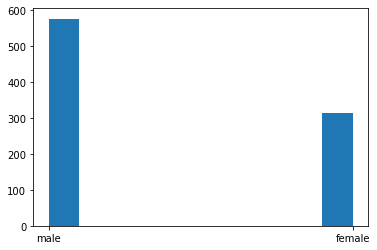

In [4]:
plt.hist(titanic_df["Sex"]);

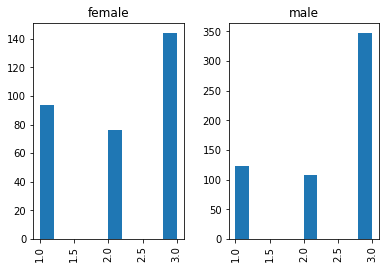

In [5]:
titanic_df["Pclass"].hist(by=titanic_df["Sex"]);

In [6]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    
    else:
        return sex

In [7]:
titanic_df["person"] = titanic_df[["Age","Sex"]].apply(male_female_child, axis=1)

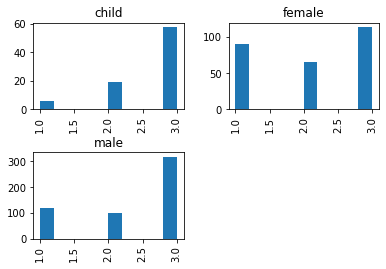

In [8]:
titanic_df["Pclass"].hist(by=titanic_df["person"]);

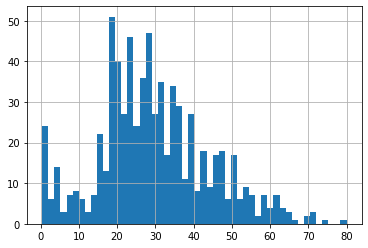

In [9]:
titanic_df["Age"].hist(bins=50);

In [10]:
titanic_df["Age"].mean()

29.69911764705882

In [11]:
titanic_df["person"].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

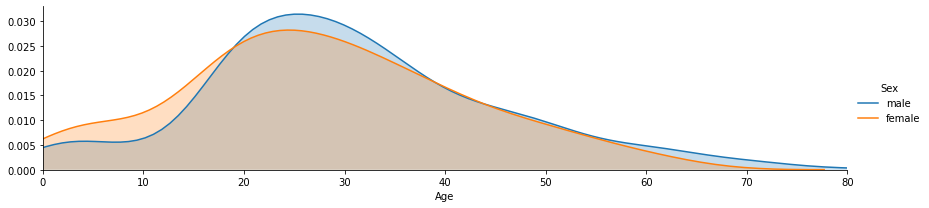

In [12]:
fig = sns.FacetGrid(titanic_df, hue="Sex", aspect=4)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df["Age"].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

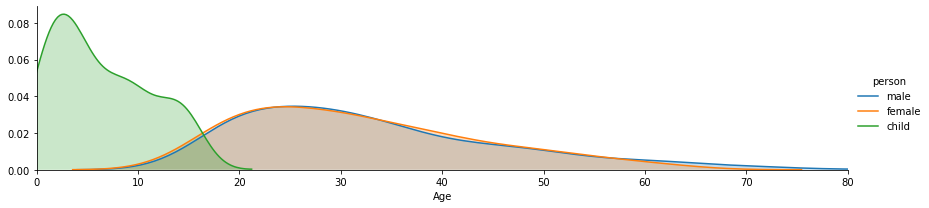

In [13]:
fig = sns.FacetGrid(titanic_df, hue="person", aspect=4)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df["Age"].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

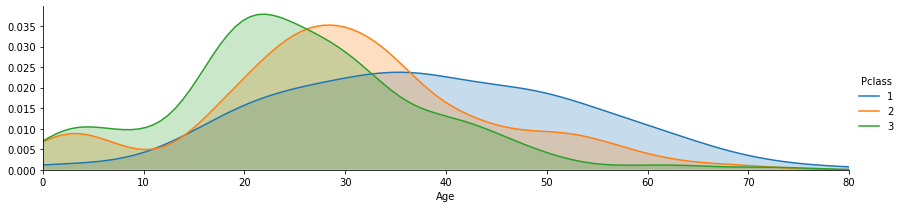

In [14]:
fig = sns.FacetGrid(titanic_df, hue="Pclass", aspect=4)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df["Age"].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [15]:
deck = titanic_df['Cabin'].dropna()

In [16]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [17]:
levels = [l[0] for l in deck]
levels.sort()

In [18]:
level_df = pd.DataFrame(levels)
level_df.columns = ["Cabin"]

In [19]:
level_df = level_df[level_df["Cabin"] != 'T']

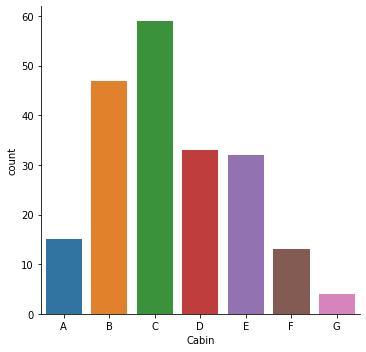

In [23]:
sns.catplot(x='Cabin',data=level_df, kind='count')

## Where did the passengers come from?

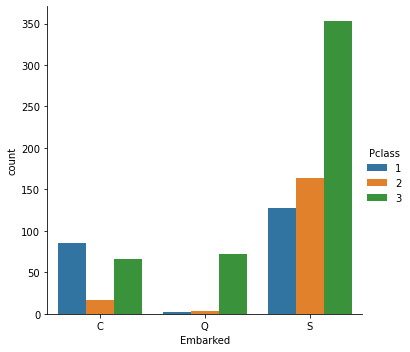

In [25]:
sns.catplot(x='Embarked', data=titanic_df, kind='count', hue='Pclass', order=['C','Q','S'])

## Who was alone and who was with family?

In [26]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [28]:
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [29]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'with Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

/home/rasputin1127/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,with Family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone


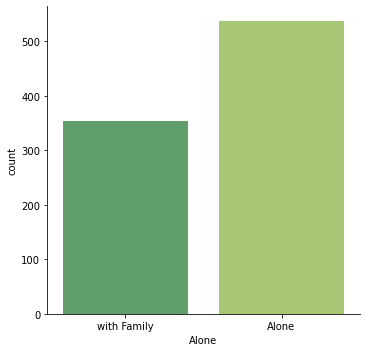

In [33]:
sns.catplot('Alone', data=titanic_df, palette='summer', kind='count')

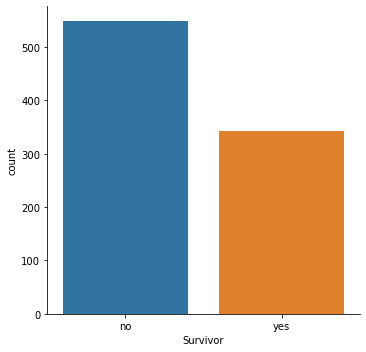

In [36]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.catplot('Survivor', data=titanic_df, kind='count')

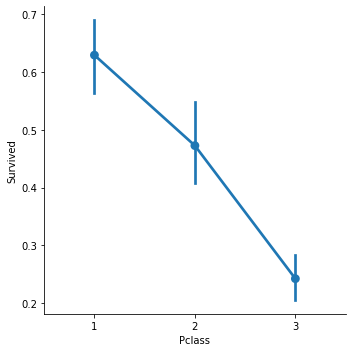

In [40]:
sns.catplot('Pclass','Survived',data=titanic_df, kind='point')

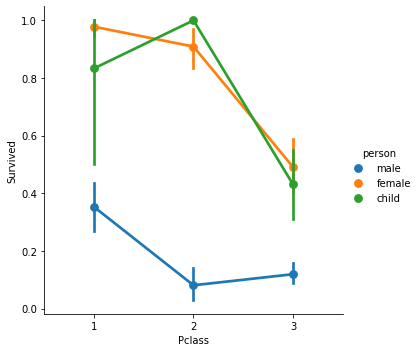

In [41]:
sns.catplot('Pclass','Survived',data=titanic_df,hue='person',kind='point')

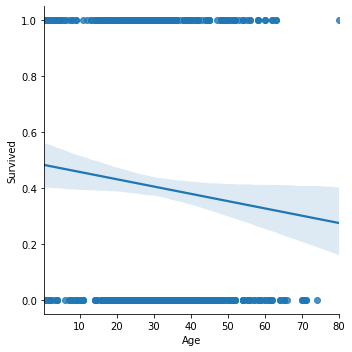

In [45]:
sns.lmplot('Age','Survived',data=titanic_df)

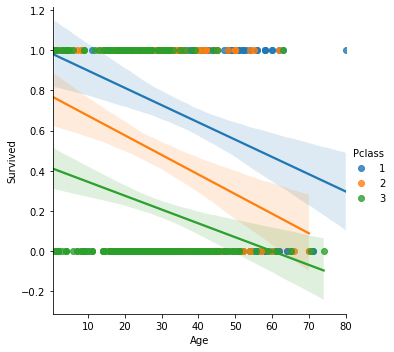

In [46]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass')

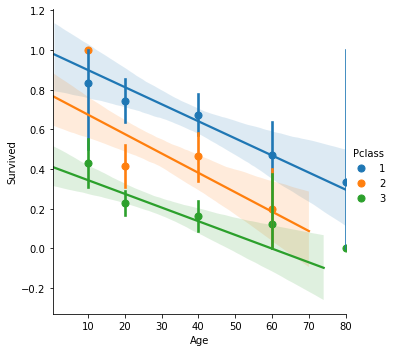

In [48]:
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',x_bins=generations)

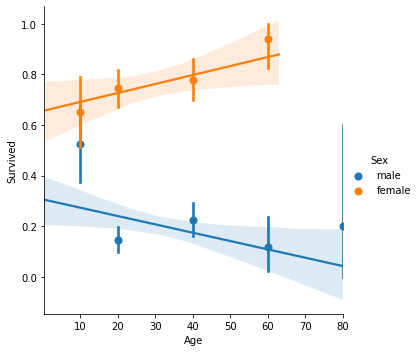

In [51]:
sns.lmplot("Age",'Survived',hue='Sex',data=titanic_df,x_bins=generations)

## Did the deck have an effect on the passengers survival rate? 

In [55]:
titanic_df['level'] = level_df['Cabin']
titanic_df['level'] = titanic_df['level'].map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5})

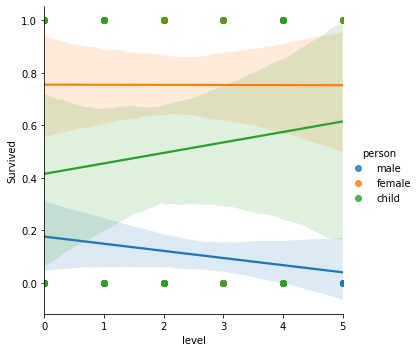

In [57]:
sns.lmplot("level","Survived",data=titanic_df,hue='person')

## Did having a family increase the odds of surviving the crash?

In [60]:
titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df['Alone'] = titanic_df['Alone'].map(lambda x: 1 if x == 0 else 0)

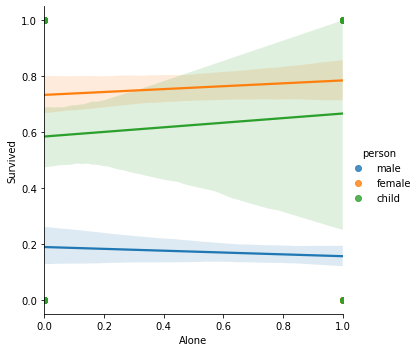

In [62]:
sns.lmplot('Alone','Survived',titanic_df, hue='person')

In [63]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,level
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,0,no,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,0,yes,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,1,yes,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,0,yes,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,1,no,0.0


In [22]:
y = titanic_df.pop('Survived')

In [105]:
sum(y)/len(y)

0.3838383838383838

In [23]:
titanic_df.drop(["Name","Ticket","Cabin"], axis=1, inplace=True)

In [24]:
titanic_df = pd.concat([titanic_df,pd.get_dummies(titanic_df["Embarked"])], axis=1)

In [25]:
titanic_df = pd.concat([titanic_df,pd.get_dummies(titanic_df["person"])], axis=1)

In [85]:
x_df = titanic_df.drop(["Sex","person","Embarked", "PassengerId"], axis=1)

In [86]:
x_df.head()

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,child,female,male
0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,1,0
2,3,26.0,0,0,7.9250,0,0,1,0,1,0
3,1,35.0,1,0,53.1000,0,0,1,0,1,0
4,3,35.0,0,0,8.0500,0,0,1,0,0,1


In [87]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
 5   C       891 non-null    uint8  
 6   Q       891 non-null    uint8  
 7   S       891 non-null    uint8  
 8   child   891 non-null    uint8  
 9   female  891 non-null    uint8  
 10  male    891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(6)
memory usage: 40.2 KB


In [88]:
x_df["Age"] = x_df["Age"].fillna(round(x_df["Age"].mean()))

In [89]:
x = x_df.values

In [90]:
x.shape

(891, 11)

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y)

In [34]:
x_train.shape

(668, 12)

In [35]:
x_test.shape

(223, 12)

In [36]:
y_train = np.asarray(y_train)

In [37]:
y_train.shape

(668,)

In [38]:
y_test = np.asarray(y_test)

In [169]:
y_test.reshape(1,-1)

array([[1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 0]])

In [137]:
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.backend import clear_session

In [141]:
clear_session()
inputs = Input((11,))
x = BatchNormalization()(inputs)
x = Dense(16, activation='tanh')(x)
x = Dense(32, activation='relu')(x)
# x = Dropout(0.1)(x)
x = Dense(64, activation='relu')(x)
# x = Dropout(0.1)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.1)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)
optimizer = Adam(learning_rate=1e-4, decay=1e-5)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [142]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 11)                44        
_________________________________________________________________
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout (Dropout)            (None, 128)              

In [148]:
history = model.fit(x_train_scaled, y_train, batch_size = 32, epochs = 500, validation_data=(x_test_scaled, y_test), verbose=1)

Epoch 1/500
21/21 [==============================] - 0s 4ms/step - loss: 0.3435 - accuracy: 0.8668 - val_loss: 0.7369 - val_accuracy: 0.7623
Epoch 2/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3584 - accuracy: 0.8368 - val_loss: 0.7088 - val_accuracy: 0.7623
Epoch 3/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3525 - accuracy: 0.8608 - val_loss: 0.6466 - val_accuracy: 0.7713
Epoch 4/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3451 - accuracy: 0.8548 - val_loss: 0.5848 - val_accuracy: 0.7758
Epoch 5/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3470 - accuracy: 0.8428 - val_loss: 0.5522 - val_accuracy: 0.7848
Epoch 6/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3406 - accuracy: 0.8578 - val_loss: 0.5160 - val_accuracy: 0.7848
Epoch 7/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3633 - accuracy: 0.8428 - val_loss: 0.4957 - val_accuracy: 0.7803
Epoch 8/500
2

Epoch 59/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3602 - accuracy: 0.8458 - val_loss: 0.4395 - val_accuracy: 0.8475
Epoch 60/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3414 - accuracy: 0.8473 - val_loss: 0.4407 - val_accuracy: 0.8430
Epoch 61/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3495 - accuracy: 0.8608 - val_loss: 0.4390 - val_accuracy: 0.8520
Epoch 62/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3619 - accuracy: 0.8473 - val_loss: 0.4411 - val_accuracy: 0.8386
Epoch 63/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3483 - accuracy: 0.8563 - val_loss: 0.4390 - val_accuracy: 0.8430
Epoch 64/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3647 - accuracy: 0.8533 - val_loss: 0.4359 - val_accuracy: 0.8520
Epoch 65/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3175 - accuracy: 0.8563 - val_loss: 0.4379 - val_accuracy: 0.8475
Epoch 

21/21 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8578 - val_loss: 0.4460 - val_accuracy: 0.8430
Epoch 174/500
21/21 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8593 - val_loss: 0.4462 - val_accuracy: 0.8475
Epoch 175/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3258 - accuracy: 0.8473 - val_loss: 0.4476 - val_accuracy: 0.8475
Epoch 176/500
21/21 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.8563 - val_loss: 0.4465 - val_accuracy: 0.8475
Epoch 177/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3470 - accuracy: 0.8353 - val_loss: 0.4474 - val_accuracy: 0.8520
Epoch 178/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3268 - accuracy: 0.8503 - val_loss: 0.4489 - val_accuracy: 0.8430
Epoch 179/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3419 - accuracy: 0.8458 - val_loss: 0.4486 - val_accuracy: 0.8386
Epoch 180/500

21/21 [==============================] - 0s 3ms/step - loss: 0.3276 - accuracy: 0.8533 - val_loss: 0.4504 - val_accuracy: 0.8520
Epoch 288/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3207 - accuracy: 0.8593 - val_loss: 0.4520 - val_accuracy: 0.8475
Epoch 289/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3185 - accuracy: 0.8578 - val_loss: 0.4526 - val_accuracy: 0.8475
Epoch 290/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3421 - accuracy: 0.8653 - val_loss: 0.4529 - val_accuracy: 0.8386
Epoch 291/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3240 - accuracy: 0.8533 - val_loss: 0.4520 - val_accuracy: 0.8430
Epoch 292/500
21/21 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8503 - val_loss: 0.4531 - val_accuracy: 0.8430
Epoch 293/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3356 - accuracy: 0.8593 - val_loss: 0.4511 - val_accuracy: 0.8565
Epoch 294/500

21/21 [==============================] - 0s 3ms/step - loss: 0.3203 - accuracy: 0.8683 - val_loss: 0.4645 - val_accuracy: 0.8430
Epoch 402/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3536 - accuracy: 0.8368 - val_loss: 0.4617 - val_accuracy: 0.8475
Epoch 403/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3276 - accuracy: 0.8668 - val_loss: 0.4612 - val_accuracy: 0.8386
Epoch 404/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3126 - accuracy: 0.8832 - val_loss: 0.4631 - val_accuracy: 0.8520
Epoch 405/500
21/21 [==============================] - 0s 3ms/step - loss: 0.3330 - accuracy: 0.8623 - val_loss: 0.4636 - val_accuracy: 0.8386
Epoch 406/500
21/21 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8638 - val_loss: 0.4634 - val_accuracy: 0.8386
Epoch 407/500
21/21 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8518 - val_loss: 0.4622 - val_accuracy: 0.8430
Epoch 408/500

In [149]:
max_val_accuracy = np.argsort(history.history['val_accuracy'])[::-1][0]

In [150]:
max_val_accuracy

439

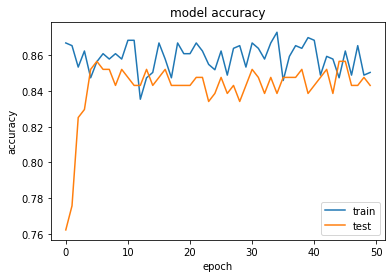

In [153]:
plt.plot(history.history['accuracy'][0::10])
plt.plot(history.history['val_accuracy'][0::10])
plt.title('model accuracy')
# plt.axvline(max_val_accuracy)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show();

In [157]:
nn_result = model.evaluate(x_test_scaled, y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.4614 - accuracy: 0.8475


In [159]:
y_pred = model.predict(x_test_scaled)

In [160]:
nn_y_hat = [1 if x > .50 else 0 for x in y_pred]

In [93]:
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()

In [95]:
x_train_scaled = scaler.fit_transform(x_train,y_train)
x_test_scaled = scaler.transform(x_test)

In [96]:
regressor = ElasticNetCV(l1_ratio=[.1, .5, .7,
    .9, .95, .99, 1])

In [97]:
regressor.fit(x_train_scaled, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1])

In [161]:
y_pred = regressor.predict(x_test_scaled)

In [162]:
elnet_y_hat = [1 if x >= .50 else 0 for x in y_pred]

In [100]:
len(np.where(y_hat != y_test)[0])

34

In [60]:
len(y_test)

223

In [101]:
223-34

189

In [102]:
189/223

0.8475336322869955

In [103]:
from sklearn.linear_model import LogisticRegressionCV

In [111]:
log_model = LogisticRegressionCV(solver='saga', max_iter=5000, penalty='elasticnet', class_weight='balanced', l1_ratios=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1])

In [112]:
log_model.fit(x_train_scaled, y_train)

LogisticRegressionCV(class_weight='balanced',
                     l1_ratios=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
                     max_iter=5000, penalty='elasticnet', solver='saga')

In [163]:
y_pred = log_model.predict(x_test_scaled)

In [164]:
log_y_hat = [1 if x > .50 else 0 for x in y_pred]

In [134]:
log_model.score(x_test_scaled, y_test)

0.8251121076233184

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [120]:
rf_model = RandomForestClassifier()

In [127]:
params = {'n_estimators':[50,100,200,500], 'max_depth':[3,5,10,15], 'class_weight':[None,'balanced']}

In [128]:
searchcv = RandomizedSearchCV(rf_model, params)

In [129]:
searchcv.fit(x_train_scaled, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'max_depth': [3, 5, 10, 15],
                                        'n_estimators': [50, 100, 200, 500]})

In [131]:
searchcv.best_params_

{'n_estimators': 200, 'max_depth': 5, 'class_weight': None}

In [165]:
y_pred = searchcv.predict(x_test_scaled )

In [166]:
searchcv_y_hat = [1 if x > .50 else 0 for x in y_pred]

In [132]:
searchcv.score(x_test_scaled, y_test)

0.8475336322869955

In [121]:
rf_model.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [122]:
rf_y_hat = rf_model.predict(x_test_scaled)

In [167]:
rf_y_hat = [1 if x > .50 else 0 for x in rf_y_hat]

In [133]:
rf_model.score(x_test_scaled, y_test)

0.8295964125560538

In [173]:
from statistics import mode

In [181]:
def ensemble_prediction(test_arr,*args):
    final_pred = np.array([])
    for i in range(0,len(test_arr)):
        curr_pred = []
        for arg in args:
            curr_pred.append(arg[i])
#             print(curr_pred)
        final_pred = np.append(final_pred, mode(curr_pred))
    return final_pred

In [183]:
ensemble_hat = ensemble_prediction(x_test_scaled, nn_y_hat, elnet_y_hat, log_y_hat, searchcv_y_hat, rf_y_hat)

In [185]:
len(np.where(ensemble_hat != y_test)[0])

35

In [186]:
223-35

188

In [187]:
188/223

0.8430493273542601